In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_csv = pd.read_csv('./data/train.csv')
state_csv = pd.read_csv('./data/state_labels.csv')
color_csv = pd.read_csv('./data/color_labels.csv')
breed_csv = pd.read_csv('./data/breed_labels.csv')

In [3]:
train_csv.head(5)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [4]:
color_csv.head(5)

,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden
3,4,Yellow
4,5,Cream


In [5]:
state_csv.head(5)

,StateID,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan
3,41401,Kuala Lumpur
4,41415,Labuan


In [6]:
breed_csv.head(5)

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita


In [7]:
train_csv.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed'],
      dtype='object')

In [8]:
color_csv.columns

Index(['ColorID', 'ColorName'], dtype='object')

In [9]:
state_csv.columns

Index(['StateID', 'StateName'], dtype='object')

In [10]:
breed_csv.columns

Index(['BreedID', 'Type', 'BreedName'], dtype='object')

In [11]:
os.listdir('./data')

['breed_labels.csv',
 'test_metadata.zip',
 'test_images.zip',
 'train_images.zip',
 'train_metadata',
 'color_labels.csv',
 'test.zip',
 'test_sentiment.zip',
 'train_sentiment.zip',
 'all.zip',
 'train_metadata.zip',
 'train.csv',
 'state_labels.csv',
 'train.zip']

In [12]:
os.listdir('./data/train_metadata')

['bc5058e64-4.json',
 '6afe7ee11-3.json',
 '093cce3a1-2.json',
 'ee5ceb065-2.json',
 '8a4c95abd-3.json',
 '56ec0a2ef-3.json',
 '7be394a98-1.json',
 'e303359a7-3.json',
 'fa0010ce5-1.json',
 '9b53610ea-1.json',
 '924cc5438-2.json',
 '79a9a7b05-4.json',
 'bb15b64ea-8.json',
 '9351715a9-6.json',
 'cc38b3b63-1.json',
 '361e79f5f-3.json',
 '3ecdd4122-1.json',
 'c2284e2e9-2.json',
 '3b2f6d5b2-5.json',
 '621a16b0c-8.json',
 'fed43b600-4.json',
 '196b39897-1.json',
 'a46ad5cc3-4.json',
 '0cd614218-9.json',
 '5b73a7ea8-1.json',
 'e6b28fc29-2.json',
 'db24c8108-6.json',
 '366a4544f-4.json',
 '61d819c6f-6.json',
 'a672ea96d-1.json',
 'f7550219b-2.json',
 '6f93a41c5-3.json',
 '18bc7bf4d-7.json',
 '463be5788-16.json',
 '172b6f611-2.json',
 '3af6477aa-1.json',
 '12c65f314-4.json',
 '12ceeda09-3.json',
 '89c8b19eb-2.json',
 'c842fa148-3.json',
 '484915b4f-4.json',
 'a3d9bc3aa-1.json',
 'a1b34954b-4.json',
 'bd2dc39e7-2.json',
 'fdd191ba0-8.json',
 'c960b413e-1.json',
 '163919bd1-1.json',
 'f93fe66ef-

In [13]:
import json

In [14]:
meta_json_demo = None
with open('./data/train_metadata/4d3526802-2.json') as f:
    meta_json_demo = json.load(f)

In [40]:
meta_json_demo['cropHintsAnnotation']

{'cropHints': [{'boundingPoly': {'vertices': [{'x': 19},
     {'x': 367},
     {'x': 367, 'y': 299},
     {'x': 19, 'y': 299}]},
   'confidence': 0.79999995,
   'importanceFraction': 0.97999996}]}

In [22]:
from PIL import Image
import matplotlib.image as mpimg

In [20]:
img1=mpimg.imread('./data/train_images/4d3526802-1.jpg')
img2=mpimg.imread('./data/train_images/4d3526802-2.jpg')
img3=mpimg.imread('./data/train_images/4d3526802-3.jpg')

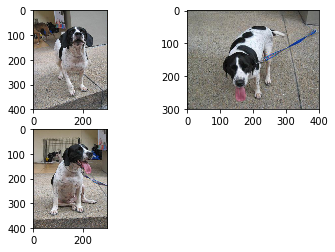

In [32]:
plt.figure(1)
plt.subplot(221)
plt.imshow(img1)
plt.subplot(222)
plt.imshow(img2)
plt.subplot(223)
plt.imshow(img3)
plt.show()

In [33]:
meta_json_demo.keys()

dict_keys(['labelAnnotations', 'imagePropertiesAnnotation', 'cropHintsAnnotation'])

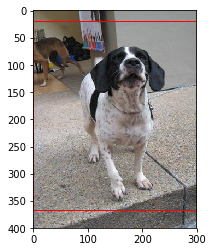

In [42]:
import matplotlib.patches as patches
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(img1)

# Create a Rectangle patch
rect = patches.Rectangle((0,19),299,348,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

In [44]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

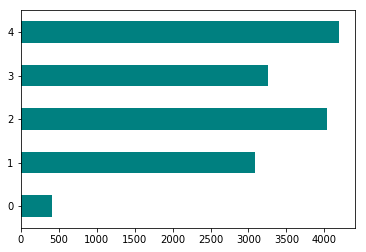

In [47]:
train_csv['AdoptionSpeed'].value_counts().sort_index().plot('barh', color='teal')

In [49]:
train_csv['Type'] = train_csv['Type'].apply(lambda x: 'Dog' if x == 1 else 'Cat')

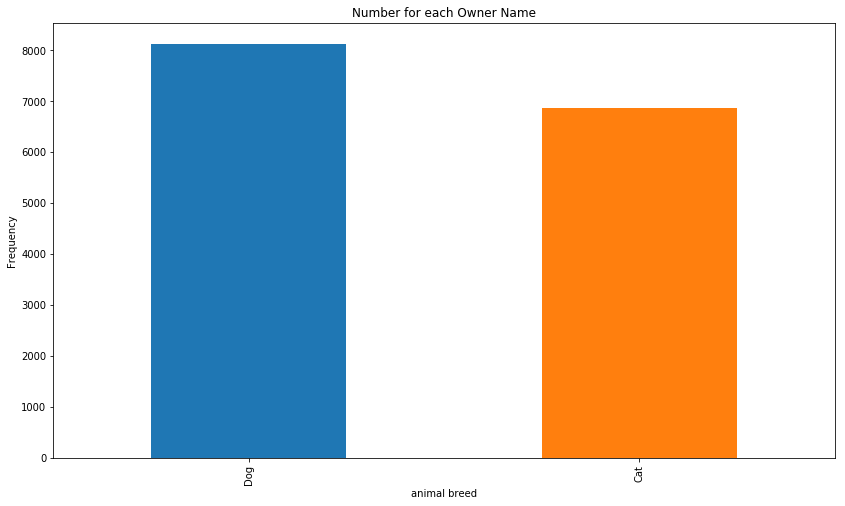

In [54]:
plt.figure(figsize=(2, 1))
ax = train_csv['Type'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each Owner Name")
ax.set_xlabel("animal breed")
ax.set_ylabel("Frequency")
plt.show()

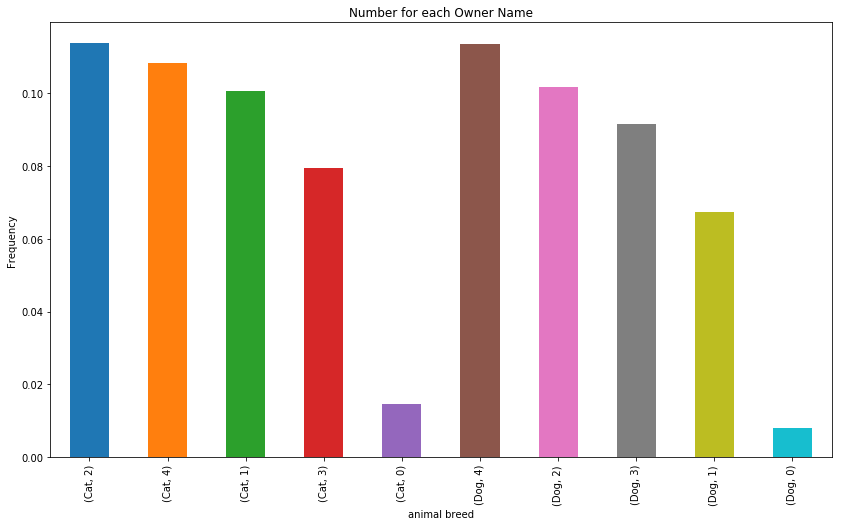

In [88]:
plt.figure(figsize=(2, 1))
ax = (train_csv.groupby(['Type'])['AdoptionSpeed'].value_counts()/train_csv.groupby(['Type'])['AdoptionSpeed'].sum()).plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each Owner Name")
ax.set_xlabel("animal breed")
ax.set_ylabel("Frequency")
plt.show()

In [86]:
train_csv.groupby(['Type'])['AdoptionSpeed'].value_counts()

Type  AdoptionSpeed
Cat   2                1873
      4                1783
      1                1655
      3                1310
      0                 240
Dog   4                2414
      2                2164
      3                1949
      1                1435
      0                 170
Name: AdoptionSpeed, dtype: int64

In [87]:
train_csv.groupby(['Type'])['AdoptionSpeed'].sum()

Type
Cat    16463
Dog    21266
Name: AdoptionSpeed, dtype: int64

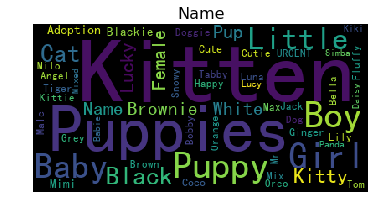

In [175]:
# 绘制名字的词频云图
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
wordcloud = WordCloud(background_color='black', max_font_size=110, min_font_size=10, mode='RGBA', font_path='/Users/higgs/Library/Fonts/SimHei.ttf')
word_frequence = Counter(train_csv['Name'])
word_frequence = sorted(word_frequence.items(), key=lambda x: x[1], reverse=True)
# word_frequence = Counter(train_csv['Name'])
# word_frequence = {x[0]:int(x[1]) for x in word_frequence.items()}
# word_frequence = {'a':3, 'b':4}
# wordcloud = wordcloud.fit_words(word_frequence)
text = 'How the Word Cloud Generator Works'
wordcloud = wordcloud.generate(' '.join(list(train_csv['Name'].dropna().values)))
# train_csv['Name'].values
# word_frequence
plt.title('Name', fontsize=16)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
# train_csv['Name'].dropna().values

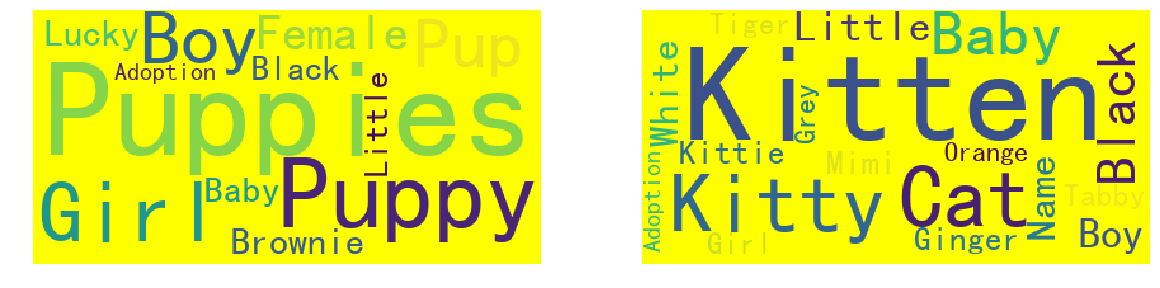

In [191]:
# 绘制名字词频云图
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud1 = WordCloud(background_color='yellow', max_font_size=110, min_font_size=20, mode='RGBA', font_path='/Users/higgs/Library/Fonts/SimHei.ttf')
wordcloud2 = WordCloud(background_color='yellow', max_font_size=110, min_font_size=20, mode='RGBA', font_path='/Users/higgs/Library/Fonts/SimHei.ttf')
dog_text = ' '.join(list(train_csv[train_csv['Type'] == 'Dog']['Name'].dropna().values))
dog_pic = wordcloud1.generate(dog_text)
cat_text = ' '.join(list(train_csv[train_csv['Type'] == 'Cat']['Name'].dropna().values))
cat_pic = wordcloud2.generate(cat_text)
f, axs = plt.subplots(1,2,figsize=(20,15))
plt.subplot(121)
plt.imshow(dog_pic)
plt.axis('off')
plt.subplot(122)
plt.imshow(cat_pic)
plt.axis('off')
plt.show()

In [171]:
list(train_csv['Name'].dropna().values)[:2]

['Nibble', 'No Name Yet']

In [194]:
print('Most popular pet names and AdoptionSpeed')
for n in train_csv['Name'].value_counts().index[:5]:
    print(n)
    print(train_csv.loc[train_csv['Name'] == n, 'AdoptionSpeed'].value_counts().sort_index())
    print('')

Most popular pet names and AdoptionSpeed
Baby
0     2
1    11
2    15
3    11
4    27
Name: AdoptionSpeed, dtype: int64

Lucky
0     5
1    14
2    16
3    12
4    17
Name: AdoptionSpeed, dtype: int64

Brownie
0     1
1    11
2    14
3    12
4    16
Name: AdoptionSpeed, dtype: int64

No Name
0     3
1    14
2    11
3     6
4    20
Name: AdoptionSpeed, dtype: int64

Mimi
0     3
1    12
2    13
3     7
4    17
Name: AdoptionSpeed, dtype: int64



In [208]:
train_csv[train_csv['Name'].isnull()]['AdoptionSpeed']
pd.crosstab(train_csv[train_csv['Name'].isnull()]['Name'], train_csv[train_csv['Name'].isnull()]['AdoptionSpeed'], normalize='index')

""
